# Action potential speed

In [1]:
import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 4]    # Do not put in same cell as import statement

In [3]:
from neuron import h, gui
import Model

In [4]:
model = Model.without_ih()

In [5]:
# Some special place
first_Bouton = model.boutons[0]
second_Bouton = model.boutons[1]
last_Bouton = model.boutons[-1]
# Checking topology
s = h.Shape()
s.show(False)
s.color(2, sec=first_Bouton)      # color first bouton red
s.color(3, sec=second_Bouton)     # color second bouton blue
s.color(4, sec=last_Bouton)       # color last bouton green

0.0

In [6]:
pre_interval = 1000.
sim_interval = 50.

In [7]:
stim = h.Ipulse1(first_Bouton(0.5))
stim.delay  = pre_interval + 5.
stim.ton  = 0.1
stim.toff = 1.9
stim.num  = 10
stim.amp  = 2

In [8]:
# Record time and voltage at first, second and last bouton
t = h.Vector()           # Time stamp vector [ms]
v1 = h.Vector()          # Membrane potential vector [mV]
v2 = h.Vector()          # Membrane potential vector [mV]
v3 = h.Vector()          # Membrane potential vector [mV]

t.record(h._ref_t) 
v1.record(first_Bouton(0.5)._ref_v)
v2.record(second_Bouton(0.5)._ref_v)
v3.record(last_Bouton(0.5)._ref_v)

Vector[6]

In [9]:
h.tstop = pre_interval + sim_interval
h.run()
t.add(-pre_interval)   # Dismiss the first 1000ms to equilibrate the membrane potential

Vector[3]

In [10]:
# Converting results to numpy arrays for use with scipy
t = np.array(t)
v1 = np.array(v1)
v2 = np.array(v2)
v3 = np.array(v3)

In [11]:
p1, _ = find_peaks(v1, height=0)  # Finding peaks above 0mV
p2, _ = find_peaks(v2, height=0)
p3, _ = find_peaks(v3, height=0)

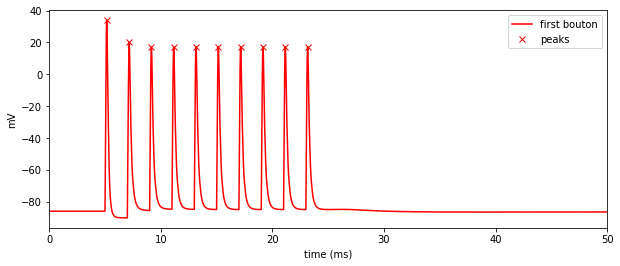

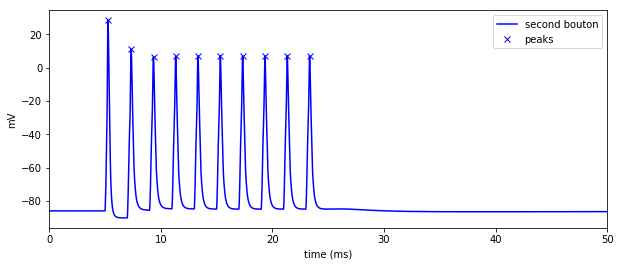

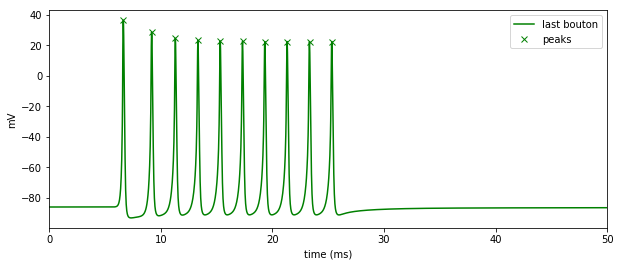

In [12]:
fig = plt.figure() 
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t, v1, color='red', label='first bouton')
plt.plot(t[p1], v1[p1], "x", color='red', label='peaks')
plt.xlim((0,sim_interval))   
plt.legend()

fig = plt.figure() 
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t, v2, color='blue', label='second bouton')
plt.plot(t[p2], v2[p2], "x", color='blue', label='peaks')
plt.xlim((0,sim_interval))   
plt.legend()

fig = plt.figure() 
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.plot(t, v3, color='green', label='last bouton')
plt.plot(t[p3], v3[p3], "x", color='green', label='peaks')
plt.xlim((0,sim_interval))   
plt.legend()

plt.show()

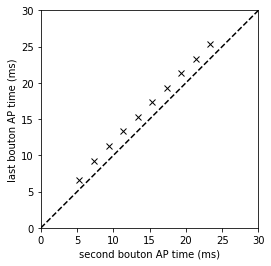

In [13]:
fig = plt.figure() 
plt.xlabel('second bouton AP time (ms)')
plt.ylabel('last bouton AP time (ms)')
plt.plot(t[p2], t[p3], "x", color='black', label="delays")
plt.plot([0, 30], [0, 30], color='black', linestyle='--')
plt.xlim((0,30))
plt.ylim((0,30))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [14]:
# Delay for corresponding peaks between second and last bouton
dt = t[p3] - t[p2]
print dt

[1.375 1.825 1.95  2.    2.    2.    2.    2.    2.    2.   ]


In [15]:
print "delay for first AP = ", dt[0], "ms"

delay for first AP =  1.3750000000050022 ms


In [16]:
ds = (model.axNum-1) * (model.boutons[0].L+model.axons[0].L)   # NEURONs distance function returns hoc error
print "distance between second and last bouton = ", ds, "um"

distance between second and last bouton =  602.0 um


In [17]:
print "conduction velocity = ", ds/dt[0]/1000, "mm/ms"

conduction velocity =  0.43781818181658905 mm/ms
